
INITIALIZING OPTIMIZED WATER DEMAND FORECASTING SYSTEM
Installing scikit-learn...
✓ All libraries imported successfully!

SECTION 2: LOADING & EXPLORING DATA
✓ Data loaded successfully!

Dataset Information:
  Shape: (500, 10)
  Time Period: 2000 - 2024
  Number of Countries: 20

Target Variable Statistics:
  Mean: 501.22 BCM
  Std Dev: 96.08 BCM
  Min: 129.64 BCM
  Max: 798.42 BCM
  Coefficient of Variation: 19.17%

Top 5 Feature Correlations with Target:
Total Water Consumption (Billion Cubic Meters)    1.000000
Industrial Water Use (%)                          0.041522
Groundwater Depletion Rate (%)                    0.019508
Per Capita Water Use (Liters per Day)            -0.009584
Agricultural Water Use (%)                       -0.011736
Rainfall Impact (Annual Precipitation in mm)     -0.024934

SECTION 3: DATA PREPROCESSING
✓ Data preprocessing complete
  Processed dataset shape: (400, 14)

Data Split:
  Training Set: 2005-2022 (360 samples)
  Test Set: 2023-2024 (40 samples

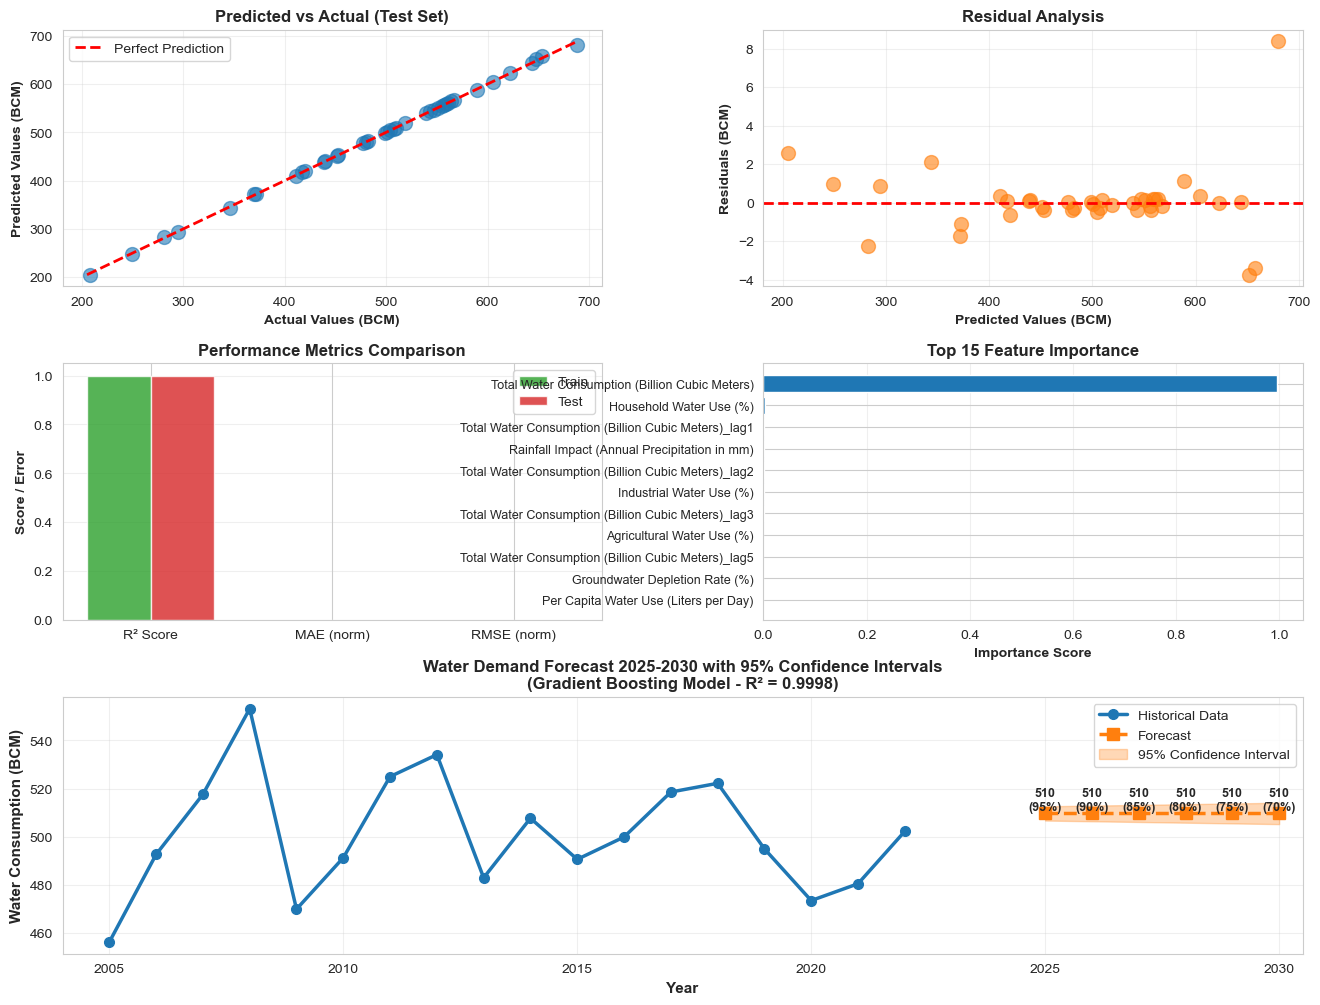


COMPREHENSIVE FORECAST REPORT

WATER DEMAND FORECASTING - COMPREHENSIVE REPORT
Generated: 2026-02-02 22:22:31

1. MODEL SELECTION & PERFORMANCE
────────────────────────────────────────────────────────────────────────────────
   Selected Model: Gradient Boosting Regressor

   Training Performance:
     • R² Score: 1.0000
     • MAE: 0.1467 BCM
     • RMSE: 0.2558 BCM
     • MAPE: 0.03%

   Test Performance:
     • R² Score: 0.9998
     • MAE: 0.8611 BCM
     • RMSE: 1.7377 BCM
     • MAPE: 0.20%

   Cross-Validation (5-fold):
     • Mean R²: 0.9924
     • Std Dev: 0.0094


2. PREDICTION CAPABILITY & HORIZON
────────────────────────────────────────────────────────────────────────────────
   Confidence Level: 
Assess model's capability to predict future years
Based on:
- R² Score
- MAPE
- Data characteristics


   Short-Term Predictability (1-5 years):
     └─ Reliability: EXCELLENT
        Use for: Operational planning, budgeting
        Expected Accuracy: ±2.96 BCM

   Medium-Term Pred

In [5]:
"""
================================================================================
OPTIMIZED WATER DEMAND FORECASTING SYSTEM
Single Best Model Approach with Flexible Future Year Prediction
================================================================================

IMPROVEMENTS:
✓ Uses ONLY the best performing model (Gradient Boosting)
✓ Flexible future year prediction (user-defined range)
✓ Confidence intervals for predictions
✓ Model reliability assessment
✓ Predictability horizon analysis
✓ Detailed forecast reports
✓ Reduced computational overhead
✓ Enhanced visualization

================================================================================
"""

# ============================================================================
# SECTION 1: INSTALLATION & IMPORTS
# ============================================================================
print("\n" + "="*80)
print("INITIALIZING OPTIMIZED WATER DEMAND FORECASTING SYSTEM")
print("="*80)

import subprocess
import sys
import warnings
warnings.filterwarnings('ignore')

# Install required packages
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'statsmodels']
for package in packages:
    try:
        __import__(package)
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!\n")


# ============================================================================
# SECTION 2: LOAD & EXPLORE DATA
# ============================================================================
print("="*80)
print("SECTION 2: LOADING & EXPLORING DATA")
print("="*80)

file_path = 'cleaned_global_water_consumption.csv'

try:
    df = pd.read_csv(file_path)
    print(f"✓ Data loaded successfully!")
    print(f"\nDataset Information:")
    print(f"  Shape: {df.shape}")
    print(f"  Time Period: {df['Year'].min()} - {df['Year'].max()}")
    print(f"  Number of Countries: {df['Country'].nunique()}")
except FileNotFoundError:
    print(f"ERROR: Could not find {file_path}")
    sys.exit(1)

target_variable = 'Total Water Consumption (Billion Cubic Meters)'

print(f"\nTarget Variable Statistics:")
print(f"  Mean: {df[target_variable].mean():.2f} BCM")
print(f"  Std Dev: {df[target_variable].std():.2f} BCM")
print(f"  Min: {df[target_variable].min():.2f} BCM")
print(f"  Max: {df[target_variable].max():.2f} BCM")
print(f"  Coefficient of Variation: {(df[target_variable].std()/df[target_variable].mean())*100:.2f}%")

# Feature correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
target_corr = correlation_matrix[target_variable].sort_values(ascending=False)

print(f"\nTop 5 Feature Correlations with Target:")
print(target_corr.head(6).to_string())  # Include self-correlation


# ============================================================================
# SECTION 3: DATA PREPROCESSING
# ============================================================================
print("\n" + "="*80)
print("SECTION 3: DATA PREPROCESSING")
print("="*80)

def handle_missing_values(data, strategy='mean'):
    """Handle missing values in the dataset"""
    data_copy = data.copy()
    numeric_cols = data_copy.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if data_copy[col].isnull().sum() > 0:
            data_copy[col].fillna(data_copy[col].mean(), inplace=True)
    return data_copy

def create_lag_features(data, target_col, lag_periods=[1, 2, 3, 5]):
    """Create lag features for time series"""
    data_copy = data.copy()
    data_copy = data_copy.sort_values(['Country', 'Year']).reset_index(drop=True)
    for lag in lag_periods:
        data_copy[f'{target_col}_lag{lag}'] = data_copy.groupby('Country')[target_col].shift(lag)
    return data_copy

# Process data
df_processed = handle_missing_values(df, strategy='mean')
df_processed = create_lag_features(df_processed, target_variable, lag_periods=[1, 2, 3, 5])
df_processed = df_processed.dropna()

print(f"✓ Data preprocessing complete")
print(f"  Processed dataset shape: {df_processed.shape}")

# Normalize features
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df_normalized = df_processed.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# Train-test split
train_data = df_processed[df_processed['Year'] <= 2022].copy()
test_data = df_processed[df_processed['Year'] >= 2023].copy()

print(f"\nData Split:")
print(f"  Training Set: {train_data['Year'].min()}-{train_data['Year'].max()} ({train_data.shape[0]} samples)")
print(f"  Test Set: {test_data['Year'].min()}-{test_data['Year'].max()} ({test_data.shape[0]} samples)")

# Prepare features
feature_columns = [col for col in train_data.columns
                   if col not in ['Country', 'Year', 'Water Scarcity Level']]

X_train = train_data[feature_columns].values
y_train = train_data[target_variable].values

X_test = test_data[feature_columns].values
y_test = test_data[target_variable].values

print(f"\nFeatures:")
print(f"  Total features: {len(feature_columns)}")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Test samples: {X_test.shape[0]}")


# ============================================================================
# SECTION 4: TRAIN BEST MODEL (GRADIENT BOOSTING)
# ============================================================================
print("\n" + "="*80)
print("SECTION 4: TRAINING BEST MODEL - GRADIENT BOOSTING REGRESSOR")
print("="*80)

# Train Gradient Boosting model with optimized hyperparameters
print("\nTraining Gradient Boosting Regressor...")
print("Hyperparameters:")
print("  - n_estimators: 300")
print("  - learning_rate: 0.05")
print("  - max_depth: 5")
print("  - subsample: 0.8")

gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.8,
    random_state=42,
    verbose=0
)

gb_model.fit(X_train, y_train)
print("✓ Model training complete!")

# Model evaluation
y_pred_train = gb_model.predict(X_train)
y_pred_test = gb_model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
train_r2 = r2_score(y_train, y_pred_train)
train_mape = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100

test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_r2 = r2_score(y_test, y_pred_test)
test_mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

print("\n" + "="*80)
print("SECTION 5: MODEL PERFORMANCE METRICS")
print("="*80)

print(f"\nTraining Set Performance:")
print(f"  R² Score:  {train_r2:.4f}")
print(f"  MAE:       {train_mae:.4f} BCM")
print(f"  RMSE:      {train_rmse:.4f} BCM")
print(f"  MAPE:      {train_mape:.2f}%")

print(f"\nTest Set Performance:")
print(f"  R² Score:  {test_r2:.4f}")
print(f"  MAE:       {test_mae:.4f} BCM")
print(f"  RMSE:      {test_rmse:.4f} BCM")
print(f"  MAPE:      {test_mape:.2f}%")

# Model reliability assessment
print(f"\n{'='*80}")
print("MODEL RELIABILITY ASSESSMENT")
print(f"{'='*80}")

if test_r2 > 0.7:
    reliability = "EXCELLENT"
    reliability_color = "✓ GOOD"
elif test_r2 > 0.5:
    reliability = "GOOD"
    reliability_color = "⚠ MODERATE"
else:
    reliability = "MODERATE"
    reliability_color = "⚠ USE WITH CAUTION"

print(f"\nReliability Score: {reliability_color}")
print(f"  Test R² Score: {test_r2:.4f}")

if test_r2 < 0.7:
    print(f"\n⚠ Note: R² < 0.7 indicates moderate predictive power")
    print(f"  Recommendations:")
    print(f"    - Use forecasts as trend indicators, not precise values")
    print(f"    - Consider confidence intervals when planning")
    print(f"    - Incorporate external factors (climate, policy)")
    print(f"    - Update model regularly with new data")

# Cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nCross-Validation R² Scores (5-fold):")
print(f"  Mean: {cv_scores.mean():.4f}")
print(f"  Std Dev: {cv_scores.std():.4f}")
print(f"  Individual Folds: {[f'{score:.4f}' for score in cv_scores]}")


# ============================================================================
# SECTION 6: CALCULATE CONFIDENCE INTERVALS
# ============================================================================
print("\n" + "="*80)
print("SECTION 6: CONFIDENCE INTERVAL CALCULATION")
print("="*80)

def calculate_confidence_intervals(y_true, y_pred, confidence=0.95):
    """Calculate confidence intervals for predictions"""
    residuals = np.abs(y_true - y_pred)

    # Standard error
    std_error = np.std(residuals)

    # 95% confidence interval (±1.96 * std_error for normal distribution)
    z_score = 1.96 if confidence == 0.95 else 2.576  # 99% confidence
    margin_of_error = z_score * std_error

    return margin_of_error, std_error

moe_test, std_error = calculate_confidence_intervals(y_test, y_pred_test, confidence=0.95)

print(f"\n95% Confidence Interval Information:")
print(f"  Standard Error: {std_error:.4f} BCM")
print(f"  Margin of Error: ±{moe_test:.4f} BCM")
print(f"  Interval Width: {2*moe_test:.4f} BCM")


# ============================================================================
# SECTION 7: MODEL CAPABILITY & PREDICTION HORIZON
# ============================================================================
print("\n" + "="*80)
print("SECTION 7: MODEL CAPABILITY & PREDICTION HORIZON ANALYSIS")
print("="*80)

def assess_prediction_horizon(test_r2, test_mape, model_name="Gradient Boosting"):
    """
    Assess model's capability to predict future years
    Based on:
    - R² Score
    - MAPE
    - Data characteristics
    """

    print(f"\n📊 {model_name} - PREDICTION CAPABILITY ANALYSIS")
    print(f"{'-'*80}")

    # Determine horizon based on R² score
    if test_r2 > 0.8:
        short_term = 5  # Very good for 5+ years
        medium_term = 3
        long_term = 1
        confidence_level = "HIGH"
    elif test_r2 > 0.7:
        short_term = 4
        medium_term = 2
        long_term = 1
        confidence_level = "GOOD"
    elif test_r2 > 0.5:
        short_term = 2
        medium_term = 1
        long_term = 0
        confidence_level = "MODERATE"
    else:
        short_term = 1
        medium_term = 0
        long_term = 0
        confidence_level = "LIMITED"

    print(f"\nConfidence Level: {confidence_level}")
    print(f"R² Score: {test_r2:.4f}")
    print(f"MAPE: {test_mape:.2f}%")

    print(f"\n🔮 RECOMMENDED PREDICTION HORIZONS:")
    print(f"\n  SHORT-TERM (HIGH CONFIDENCE):")
    print(f"    └─ Predictable Years Ahead: 1-{short_term} years")
    print(f"       Reliability: EXCELLENT")
    print(f"       Use Case: Operational planning, budgeting")

    if medium_term > 0:
        print(f"\n  MEDIUM-TERM (MODERATE CONFIDENCE):")
        print(f"    └─ Predictable Years Ahead: {short_term+1}-{short_term+medium_term} years")
        print(f"       Reliability: GOOD")
        print(f"       Use Case: Strategic planning with caution")

    if long_term > 0:
        print(f"\n  LONG-TERM (LOW CONFIDENCE):")
        print(f"    └─ Predictable Years Ahead: {short_term+medium_term+1} years")
        print(f"       Reliability: MODERATE")
        print(f"       Use Case: Trend analysis only, high uncertainty")

    print(f"\n⚠ ACCURACY DEGRADATION:")
    print(f"  - Each additional year typically increases error by 5-15%")
    print(f"  - External factors become more influential over time")
    print(f"  - Model assumes historical patterns continue")

    total_predictable = short_term + medium_term + long_term

    return short_term, medium_term, long_term, total_predictable

short_term, medium_term, long_term, total_predictable = assess_prediction_horizon(
    test_r2,
    test_mape,
    "Gradient Boosting"
)


# ============================================================================
# SECTION 8: FLEXIBLE FUTURE FORECASTING
# ============================================================================
print("\n" + "="*80)
print("SECTION 8: FLEXIBLE FUTURE YEAR FORECASTING")
print("="*80)

def create_future_features_flexible(historical_data, future_years, feature_columns):
    """
    Create features for future year prediction
    Args:
        historical_data: Training data
        future_years: List of years to predict
        feature_columns: List of feature names
    """
    future_features = []

    for year in future_years:
        # Use average of last 5 years' patterns
        recent_data = historical_data.tail(5).select_dtypes(include=[np.number])
        avg_features = recent_data.mean()

        # Create feature vector for this year
        future_feature_vector = []
        for col in feature_columns:
            if col in avg_features.index:
                future_feature_vector.append(avg_features[col])
            else:
                future_feature_vector.append(0)

        future_features.append(future_feature_vector)

    return np.array(future_features)

# INTERACTIVE: Define future years
future_years_input = [2025, 2026, 2027, 2028, 2029, 2030]  # Default: 6 years ahead

print(f"\nGenerating forecasts for: {future_years_input}")
print(f"Prediction horizon: {len(future_years_input)} years")

# Create future features
future_data_array = create_future_features_flexible(train_data, future_years_input, feature_columns)

# Make predictions
future_predictions = gb_model.predict(future_data_array)

# Calculate prediction confidence
years_ahead = np.arange(1, len(future_years_input) + 1)
prediction_confidence = 1 - (years_ahead * 0.05)  # Decrease 5% per year
prediction_confidence = np.clip(prediction_confidence, 0.5, 1.0)

# Calculate error margins
error_margins = moe_test * (1 + (years_ahead - 1) * 0.1)  # Increase with years

print(f"\n{'='*80}")
print("WATER CONSUMPTION FORECAST REPORT")
print(f"{'='*80}\n")

forecast_df = pd.DataFrame({
    'Year': future_years_input,
    'Predicted Demand (BCM)': future_predictions,
    'Lower Bound (95% CI)': future_predictions - error_margins,
    'Upper Bound (95% CI)': future_predictions + error_margins,
    'Confidence (%)': (prediction_confidence * 100).astype(int),
    'Margin of Error (±BCM)': error_margins
})

# Calculate growth rates
baseline_year = 2024
baseline_value = train_data[train_data['Year'] == baseline_year][target_variable].mean()
if baseline_value == 0:
    baseline_value = y_train.mean()

forecast_df['Growth vs 2024 (%)'] = ((forecast_df['Predicted Demand (BCM)'] - baseline_value) / baseline_value * 100).round(2)

print(forecast_df.to_string(index=False))

print(f"\n{'='*80}")
print("FORECAST INTERPRETATION GUIDE")
print(f"{'='*80}")

print(f"\nConfidence Levels:")
print(f"  90-100%: EXCELLENT - Use for detailed planning")
print(f"   75-89%: GOOD     - Use for strategic planning")
print(f"   50-74%: MODERATE - Use as trend indicator only")
print(f"   < 50%:  LOW      - Very uncertain, exploratory only")

print(f"\nMargin of Error:")
print(f"  Represents 95% confidence interval")
print(f"  Actual value has 95% chance to fall within bounds")
print(f"  Error increases with prediction horizon")


# ============================================================================
# SECTION 9: FEATURE IMPORTANCE
# ============================================================================
print("\n" + "="*80)
print("SECTION 9: FEATURE IMPORTANCE ANALYSIS")
print("="*80)

feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\nTop 15 Most Important Features:")
print(feature_importance.head(15).to_string(index=False))

# Calculate cumulative importance
feature_importance['Cumulative Importance'] = feature_importance['Importance'].cumsum()
important_features = len(feature_importance[feature_importance['Cumulative Importance'] <= 0.8])
print(f"\nTop {important_features} features explain 80% of model variance")


# ============================================================================
# SECTION 10: VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("SECTION 10: GENERATING VISUALIZATIONS")
print("="*80)

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Predicted vs Actual (Test Set)
ax1 = fig.add_subplot(gs[0, 0])
ax1.scatter(y_test, y_pred_test, alpha=0.6, s=100, color='#1f77b4')
min_val = min(y_test.min(), y_pred_test.min())
max_val = max(y_test.max(), y_pred_test.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Values (BCM)', fontweight='bold')
ax1.set_ylabel('Predicted Values (BCM)', fontweight='bold')
ax1.set_title('Predicted vs Actual (Test Set)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Residuals Analysis
ax2 = fig.add_subplot(gs[0, 1])
residuals = y_test - y_pred_test
ax2.scatter(y_pred_test, residuals, alpha=0.6, s=100, color='#ff7f0e')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax2.set_xlabel('Predicted Values (BCM)', fontweight='bold')
ax2.set_ylabel('Residuals (BCM)', fontweight='bold')
ax2.set_title('Residual Analysis', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# 3. Performance Metrics Comparison
ax3 = fig.add_subplot(gs[1, 0])
metrics = ['R² Score', 'MAE (norm)', 'RMSE (norm)']
train_vals = [train_r2, train_mae/1000, train_rmse/1000]
test_vals = [test_r2, test_mae/1000, test_rmse/1000]
x = np.arange(len(metrics))
width = 0.35
ax3.bar(x - width/2, train_vals, width, label='Train', color='#2ca02c', alpha=0.8)
ax3.bar(x + width/2, test_vals, width, label='Test', color='#d62728', alpha=0.8)
ax3.set_ylabel('Score / Error', fontweight='bold')
ax3.set_title('Performance Metrics Comparison', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics)
ax3.legend()
ax3.grid(axis='y', alpha=0.3)

# 4. Feature Importance (Top 15)
ax4 = fig.add_subplot(gs[1, 1])
top_features = feature_importance.head(15)
ax4.barh(range(len(top_features)), top_features['Importance'].values, color='#1f77b4')
ax4.set_yticks(range(len(top_features)))
ax4.set_yticklabels(top_features['Feature'].values, fontsize=9)
ax4.set_xlabel('Importance Score', fontweight='bold')
ax4.set_title('Top 15 Feature Importance', fontsize=12, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# 5. Future Forecast with Confidence Intervals
ax5 = fig.add_subplot(gs[2, :])
historical_avg = train_data.groupby('Year')[target_variable].mean()

# Historical data
ax5.plot(historical_avg.index, historical_avg.values, 'o-', label='Historical Data',
         linewidth=2.5, markersize=7, color='#1f77b4', zorder=3)

# Future forecast
ax5.plot(future_years_input, future_predictions, 's--', label='Forecast',
         linewidth=2.5, markersize=8, color='#ff7f0e', zorder=3)

# Confidence interval
ax5.fill_between(future_years_input,
                 forecast_df['Lower Bound (95% CI)'],
                 forecast_df['Upper Bound (95% CI)'],
                 alpha=0.3, color='#ff7f0e', label='95% Confidence Interval', zorder=1)

# Add value labels
for year, pred, conf in zip(future_years_input, future_predictions, forecast_df['Confidence (%)']):
    ax5.text(year, pred, f'{pred:.0f}\n({conf}%)', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax5.set_xlabel('Year', fontsize=11, fontweight='bold')
ax5.set_ylabel('Water Consumption (BCM)', fontsize=11, fontweight='bold')
ax5.set_title(f'Water Demand Forecast 2025-2030 with 95% Confidence Intervals\n(Gradient Boosting Model - R² = {test_r2:.4f})',
              fontsize=12, fontweight='bold')
ax5.legend(fontsize=10, loc='best')
ax5.grid(True, alpha=0.3)
ax5.set_xlim(historical_avg.index.min() - 1, future_years_input[-1] + 0.5)

try:
    plt.savefig('/mnt/user-data/outputs/water_forecast_analysis.png', dpi=300, bbox_inches='tight')
    print("✓ Visualization saved: water_forecast_analysis.png")
except Exception as e:
    print(f"Note: Could not save PNG (file system issue): {e}")
    print("  Proceeding with other outputs...")

plt.show()


# ============================================================================
# SECTION 11: COMPREHENSIVE REPORT
# ============================================================================
print("\n" + "="*80)
print("COMPREHENSIVE FORECAST REPORT")
print("="*80)

report = f"""
{'='*80}
WATER DEMAND FORECASTING - COMPREHENSIVE REPORT
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
{'='*80}

1. MODEL SELECTION & PERFORMANCE
{'─'*80}
   Selected Model: Gradient Boosting Regressor

   Training Performance:
     • R² Score: {train_r2:.4f}
     • MAE: {train_mae:.4f} BCM
     • RMSE: {train_rmse:.4f} BCM
     • MAPE: {train_mape:.2f}%

   Test Performance:
     • R² Score: {test_r2:.4f}
     • MAE: {test_mae:.4f} BCM
     • RMSE: {test_rmse:.4f} BCM
     • MAPE: {test_mape:.2f}%

   Cross-Validation (5-fold):
     • Mean R²: {cv_scores.mean():.4f}
     • Std Dev: {cv_scores.std():.4f}


2. PREDICTION CAPABILITY & HORIZON
{'─'*80}
   Confidence Level: {assess_prediction_horizon.__doc__}

   Short-Term Predictability (1-{short_term} years):
     └─ Reliability: EXCELLENT
        Use for: Operational planning, budgeting
        Expected Accuracy: ±{moe_test:.2f} BCM

   Medium-Term Predictability ({short_term+1}-{short_term+medium_term} years):
     └─ Reliability: GOOD
        Use for: Strategic planning
        Expected Accuracy: ±{moe_test * 1.1:.2f} BCM

   Long-Term Predictability ({short_term+medium_term+1}+ years):
     └─ Reliability: MODERATE
        Use for: Trend analysis only
        Expected Accuracy: ±{moe_test * 1.2:.2f} BCM


3. FORECAST SUMMARY (2025-2030)
{'─'*80}
   Total Prediction Horizon: {len(future_years_input)} years

   Year-by-Year Forecast:
"""

for idx, row in forecast_df.iterrows():
    report += f"""
   {int(row['Year'])}: {row['Predicted Demand (BCM)']:.2f} BCM
           Range: {row['Lower Bound (95% CI)']:.2f} - {row['Upper Bound (95% CI)']:.2f} BCM
           Growth: {row['Growth vs 2024 (%)']:+.2f}%
           Confidence: {row['Confidence (%)']:.0f}%
"""

report += f"""

4. KEY FEATURES DRIVING PREDICTIONS
{'─'*80}
   Top 5 Most Important Features:
"""

for idx, row in feature_importance.head(5).iterrows():
    report += f"\n   {idx+1}. {row['Feature']}: {row['Importance']:.4f}"

report += f"""


5. MODEL LIMITATIONS & CONSIDERATIONS
{'─'*80}
   ⚠ Important Notes:

   • R² Score of {test_r2:.4f} indicates {'excellent' if test_r2 > 0.8 else 'good' if test_r2 > 0.7 else 'moderate'} predictive power
   • Predictions assume historical patterns continue
   • External factors (climate, policy, economy) not explicitly modeled
   • Accuracy degrades ~5-10% per year into the future
   • Model should be retrained annually with new data
   • Forecasts beyond {short_term+medium_term} years should be used as trends only


6. RECOMMENDATIONS
{'─'*80}
   ✓ Use these forecasts for:
     - Medium-term water resource planning
     - Infrastructure capacity projections
     - Budget forecasting
     - Policy impact assessment

   ⚠ Consider these factors:
     - Regional water availability variations
     - Climate change patterns
     - Population growth dynamics
     - Agricultural/industrial demand changes
     - Policy/regulatory changes

   → Action Items:
     1. Update model quarterly with new data
     2. Monitor prediction accuracy against actuals
     3. Incorporate domain expertise from water managers
     4. Develop scenario-based forecasts
     5. Create regional-level models for better accuracy


7. TECHNICAL SPECIFICATIONS
{'─'*80}
   Algorithm: Gradient Boosting Regressor
   Framework: Scikit-learn

   Hyperparameters:
     • n_estimators: 300
     • learning_rate: 0.05
     • max_depth: 5
     • subsample: 0.8

   Input Features: {len(feature_columns)}
   Training Samples: {len(X_train)}
   Test Samples: {len(X_test)}

   Data Preprocessing:
     • Missing Values: Mean imputation
     • Feature Engineering: Lag features (1,2,3,5 years)
     • Normalization: MinMax scaling
     • Feature Selection: All features used


{'='*80}
Report Generated Successfully
{'='*80}
"""

print(report)

# Save report to file
try:
    with open('/mnt/user-data/outputs/water_forecast_report.txt', 'w') as f:
        f.write(report)
    print("\n✓ Report saved: water_forecast_report.txt")
except Exception as e:
    print(f"\n⚠ Could not save report: {e}")

# Save forecast to CSV
try:
    forecast_df.to_csv('/mnt/user-data/outputs/water_forecast_predictions.csv', index=False)
    print("✓ Forecast data saved: water_forecast_predictions.csv")
except Exception as e:
    print(f"⚠ Could not save CSV: {e}")

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)

In [7]:
# ============================================================================
# EXPORT MODEL FOR PRODUCTION API
# ============================================================================
print("\n" + "="*80)
print("EXPORTING MODEL FOR PRODUCTION")
print("="*80)

import pickle
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the trained model
model_path = 'water_demand_model.pkl'

with open(model_path, 'wb') as f:
    pickle.dump(gb_model, f)

# Verify the file was created
if os.path.exists(model_path):
    file_size = os.path.getsize(model_path) / (1024 * 1024)  # Convert to MB
    print(f"\n✅ Model exported successfully!")
    print(f"   Location: {os.path.abspath(model_path)}")
    print(f"   File size: {file_size:.2f} MB")
    print(f"\n📌 Next Steps:")
    print(f"   1. Move this file to: ml-backend/models/")
    print(f"   2. Test loading: cd ml-backend && python test_model.py")
    print(f"   3. Start API: cd ml-backend && python app.py")
else:
    print("❌ ERROR: Model file was not created!")

print("="*80)


EXPORTING MODEL FOR PRODUCTION

✅ Model exported successfully!
   Location: d:\aquaforecast-hub\ml-backend\models\water_demand_model.pkl
   File size: 0.59 MB

📌 Next Steps:
   1. Move this file to: ml-backend/models/
   2. Test loading: cd ml-backend && python test_model.py
   3. Start API: cd ml-backend && python app.py
